In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Boston.csv")

In [3]:
dataset.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
dataset.shape

(506, 15)

In [5]:
ind = dataset.drop(["Unnamed: 0", "medv"], axis=1) # Independent factors
dep = dataset["medv"] # Dependent factors

In [6]:
# Split data into learning & testing sets
from sklearn.model_selection import train_test_split
ind_train, ind_test, dep_train, dep_test = train_test_split(ind, dep, test_size=0.3)

In [7]:
# Run linear regression (ML)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(ind_train, dep_train)

/Users/kerem/Dropbox/Software/Kerem/Development/Python Library/Boston Housing Prices/venv/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Do prediction on test data & measure
dep_pred = regressor.predict(ind_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dep_test, dep_pred)

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

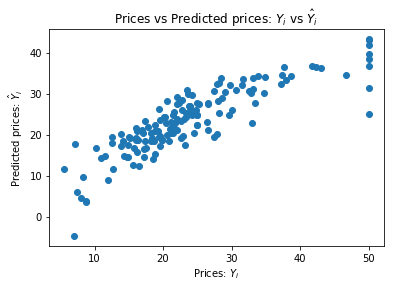

In [10]:
# Visualise
plt.scatter(dep_test, dep_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")